In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
all_data = pd.read_pickle('./data/no_singletons_data.pkl')

print(all_data)
# all_data = all_data.drop_duplicates(subset=['Team', 'Opponent'])
# all_data = all_data.groupby(['Team', 'Opponent'], as_index=False).mean()
# Group by 'Date', 'Team', and 'Opponent' 


all_data

                     Date    Type Opponent    Tm    Opp  \
0     2023-11-06 00:00:00     REG    UConn  52.0   95.0   
1     2023-11-11 00:00:00     REG    UConn  67.0  107.0   
2     2023-11-14 00:00:00     REG    UConn  53.0   87.0   
3     2023-11-19 00:00:00     REG    UConn  57.0   77.0   
4     2023-11-20 00:00:00     REG    UConn  71.0   81.0   
...                   ...     ...      ...   ...    ...   
2371  2024-03-02 00:00:00     REG   Wagner  57.0   54.0   
2372  2024-03-06 00:00:00  CTOURN   Wagner  57.0   60.0   
2373  2024-03-09 00:00:00  CTOURN   Wagner  56.0   66.0   
2374  2024-03-12 00:00:00  CTOURN   Wagner  47.0   54.0   
2376  2024-03-21 00:00:00    NCAA   Wagner  90.0   62.0   

                           Team  Diff  
0              Northern Arizona -43.0  
1                     Stonehill -40.0  
2      Mississippi Valley State -34.0  
3                       Indiana -20.0  
4                         Texas -10.0  
...                         ...   ...  
2371       

,Date,Type,Opponent,Tm,Opp,Team,Diff
0,2023-11-06 00:00:00,REG,UConn,52.0,95.0,Northern Arizona,-43.0
1,2023-11-11 00:00:00,REG,UConn,67.0,107.0,Stonehill,-40.0
2,2023-11-14 00:00:00,REG,UConn,53.0,87.0,Mississippi Valley State,-34.0
3,2023-11-19 00:00:00,REG,UConn,57.0,77.0,Indiana,-20.0
4,2023-11-20 00:00:00,REG,UConn,71.0,81.0,Texas,-10.0
...,...,...,...,...,...,...,...
2371,2024-03-02 00:00:00,REG,Wagner,57.0,54.0,FDU,3.0
2372,2024-03-06 00:00:00,CTOURN,Wagner,57.0,60.0,Sacred Heart,-3.0
2373,2024-03-09 00:00:00,CTOURN,Wagner,56.0,66.0,Central Connecticut State,-10.0
2374,2024-03-12 00:00:00,CTOURN,Wagner,47.0,54.0,Merrimack,-7.0


[('Abilene Christian', 'Grand Canyon', {'weight': 73.5, 'id': 0}), ('Abilene Christian', 'NC State', {'weight': 84.0, 'id': 1}), ('Abilene Christian', 'Western Ky', {'weight': 86.0, 'id': 2}), ('Grand Canyon', 'Abilene Christian', {'weight': 71.5, 'id': 0}), ('Grand Canyon', 'Alabama', {'weight': 72.0, 'id': 45}), ('Grand Canyon', 'California Baptist', {'weight': 61.5, 'id': 299}), ('Grand Canyon', 'Liberty', {'weight': 64.0, 'id': 731}), ('Grand Canyon', 'Louisiana Tech', {'weight': 70.0, 'id': 732}), ('Grand Canyon', 'North Dakota State', {'weight': 71.0, 'id': 733}), ('Grand Canyon', 'Northern Arizona', {'weight': 55.0, 'id': 734}), ('Grand Canyon', 'Portland', {'weight': 63.0, 'id': 735}), ('Grand Canyon', 'Saint Marys', {'weight': 66.0, 'id': 736}), ('Grand Canyon', 'Sam Houston', {'weight': 64.0, 'id': 737}), ('Grand Canyon', 'San Diego State', {'weight': 73.0, 'id': 738}), ('Grand Canyon', 'San Francisco', {'weight': 72.0, 'id': 739}), ('Grand Canyon', 'Seattle', {'weight': 82.0

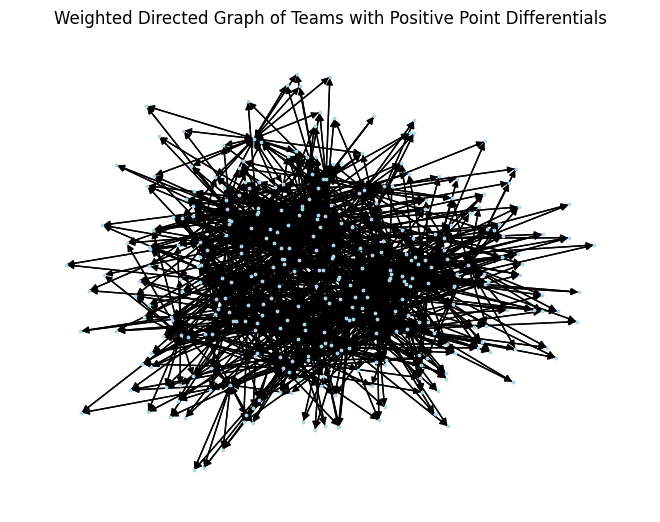

In [119]:
df = all_data.copy()

# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph based on the positive point differential
for index, row in df.iterrows():
    # if row['Diff'] > 0:
    G.add_edge(row['Team'], row['Opponent'], weight=row['Opp'], id=index)
    # else:
    G.add_edge(row['Opponent'], row['Team'], weight=row['Tm'], id=index)

print(list(G.edges(data=True)))


# Draw the graph with edge labels (weights)
pos = nx.spring_layout(G)
nx.draw(G, pos, node_size=3, node_color='lightblue', font_size=1, font_color='black', font_weight='bold', arrows=True, arrowstyle='-|>', arrowsize=10)
# edge_labels = nx.get_edge_attributes(G, 'weight')
# nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Weighted Directed Graph of Teams with Positive Point Differentials")
plt.show()


In [ ]:
import random
import numpy as np

def random_edge_subgraph(graph, drop_rate):
    sample_edges = random.sample(list(graph.edges(data=True)), int(graph.number_of_edges() * (1 - drop_rate)))
    sample_edge_set = {(u, v) for u, v, d in sample_edges}

    def filter_edges(u, v):
        data = graph.get_edge_data(u, v)
        for edge in sample_edges:
            if (edge[0] == u and edge[1] == v) or (edge[0] == v and edge[1] == u) and edge[2]['id'] == data['id']:
                return False
        return True

    # def filter_edges(u, v): 
    #     return not ((u, v) in sample_edge_set or (v, u) in sample_edge_set)

    subgraph = nx.subgraph_view(graph, filter_edge=filter_edges)
    return subgraph, subgraph.edges(data=True)

def ransac(graph, num_iters=1000, drop_rate=0.05):
    
    full_graph_pagerank = nx.pagerank(graph, weight='weight', max_iter=100, alpha=0.95)
    full_rank = np.array([full_graph_pagerank[node] for node in graph.nodes()])
    median = np.median(full_rank)
    median_ad = np.median(np.abs(full_rank - median))

    sample_ranks = []
    for i in range(num_iters):
        subgraph, subgraph_edges = random_edge_subgraph(graph, drop_rate)
        # print(subgraph)
        # print(subgraph_edges)
        sample_pagerank = nx.pagerank(subgraph, weight='weight', max_iter=100, alpha=0.95)
        sample_rank = np.array([sample_pagerank[node] for node in subgraph.nodes()])
        sample_ranks.append(sample_rank)
        
        inliers = np.abs(sample_rank - median) < 2 * median_ad
        if np.sum(inliers) > 0.8 * len(inliers):
            return inliers, sample_rank, subgraph_edges, np.array(sample_ranks[:-1]), i

    raise Exception("No inliers found; try different values for num_iters and drop_rate")

inliers, sample_rank, subgraph_edges, sample_ranks, num_iters = ransac(G, num_iters=1000, drop_rate=0.05)

print(len(inliers))
print(sample_ranks)

329
[]


In [ ]:
import random
import numpy as np

def random_edge_subgraph(graph, drop_rate):
    # Collect all edges in the graph with their data
    all_edges = list(graph.edges(data=True))
    
    sample_size = int(graph.number_of_edges() * (1 - drop_rate))
    sample_edges = random.sample(all_edges, sample_size)
    
    sample_ids = {data['id'] for u, v, data in sample_edges}

    # print(len(sample_ids))

    def filter_edges(u, v):
        data = graph.get_edge_data(u, v)
        return data['id'] in sample_ids

    subgraph = nx.subgraph_view(graph, filter_edge=filter_edges)
    
    # print(len(graph.edges()), len(subgraph.edges()), len(sample_edges))
    return subgraph, sample_edges


def calc_error(ranks, edges):
        # populate edge pairs
        errors = []
        edge_groups = {}
        for u, v, data in edges:
            edge_id = data['id']
            if edge_id not in edge_groups:
                edge_groups[edge_id] = []
            edge_groups[edge_id].append((u, v, data))

        for edge_id, edges in edge_groups.items():
            if len(edges) == 2:
                u, v, d1 = edges[0]
                v, u, d2 = edges[1]
                w1, w2 = d1['weight'], d2['weight']
                pr_u, pr_v = ranks.get(u, 0), ranks.get(v, 0)
                errors.append(w1*pr_u - w2*pr_v)
        return sum([err**2 for err in errors])

def evaluate_inlier_status(rank, graph_edges, t):
    confirmed_inliers = []
    # populate edge pairs
    edge_groups = {}
    for u, v, data in graph_edges:
        edge_id = data['id']
        if edge_id not in edge_groups:
            edge_groups[edge_id] = []
        edge_groups[edge_id].append((u, v, data))

    # Evaluate all edges for inlier status
    for edge_id, edges in edge_groups.items():
        if len(edges) == 2:
            u, v, d1 = edges[0]
            v, u, d2 = edges[1]
            w1, w2 = d1['weight'], d2['weight']
            pr_u, pr_v = rank.get(u, 0), rank.get(v, 0)
            if abs(w1*pr_u - w2*pr_v) < t:
                confirmed_inliers.extend(edges)
    return confirmed_inliers



def ransac(graph, num_iters=100, drop_rate=0.2):

    best_model = None
    best_err = 10**8
    t = 0.90
    inlier_threshold = 0.45

    sample_ranks = np.zeros((num_iters, len(graph.nodes())))
    for i in range(num_iters):
        # random subgraph selection
        subgraph, _ = random_edge_subgraph(graph, drop_rate)

        # fit model to subgraph
        sample_pagerank = nx.pagerank(subgraph, weight='weight', max_iter=100, alpha=0.95)        
        sample_rank = np.array([sample_pagerank[node] for node in subgraph.nodes()])
        sample_ranks[i,:] = sample_rank  # keep track of ranks

        # determine which are inliers
        confirmed_inliers = evaluate_inlier_status(sample_pagerank, subgraph.edges(data=True), t)  
        
        # if enough inliers for good model
        # print(len(confirmed_inliers)/len(graph.edges()))
        if len(confirmed_inliers) >  inlier_threshold*len(graph.edges()):
            inlier_subgraph = nx.DiGraph()
            inlier_subgraph.add_nodes_from(graph.nodes())
            inlier_subgraph.add_edges_from(confirmed_inliers)

            better_model = nx.pagerank(inlier_subgraph, weight='weight', max_iter=100, alpha=0.95)            
            this_err = calc_error(better_model, inlier_subgraph.edges(data=True))
            print(this_err)
            if this_err < best_err:
                best_model = better_model
                best_err = this_err

    if best_model is None:
        raise Exception("No inliers found; try different values for num_iters and drop_rate")
    else:
        return best_model, best_err, sample_ranks



best_model, best_err, sample_ranks = ransac(G, num_iters=100, drop_rate=0.1)

# print(sample_ranks.shape, sample_ranks)

print(best_err)
# # print(best_model)

        
for elt in sorted(list(best_model.items()), key=lambda x: -x[1]):
    print(elt)

# print()
sample_vars = np.mean(np.var(sample_ranks, axis=0))
print(sample_vars)

# model = nx.pagerank(G, weight='weight', max_iter=100, alpha=0.95)
# # for elt in sorted(list(model.items()), key=lambda x: -x[1]):
# #     print(elt)
# print(calc_error(model, G.edges(data=True)))

233.54871433099578
234.2091923902901
232.90805846805625
232.66608674400152
234.23146902352593
230.2828821354163
229.5404980711406
234.28903080264507
234.14047156443402
231.81599749174336
232.9120476905288
234.2488545481644
230.80501843120624
230.427464818243
231.4317508381064
233.09348923453646
233.52664275937627
233.06913319026896
232.26987846206444
233.02252743282992
231.66770223671355
234.19851860802015
232.71268964994894
233.38389043123075
232.38386369409255
231.9900667729089
232.92758745784346
230.84964241049173
232.61591065498155
232.32030512086408
232.39881880706736
230.48149470071266
233.19578269845746
233.1807399335351
233.36926457943733
233.32908633682467
234.43558132927166
231.53242076449308
232.52501162592733
234.1557604454087
233.0483295456
231.00299661514944
233.76167067894235
232.32512437160935
232.00732822951863
233.44003814739028
232.94350314593137
233.90922613188886
231.61453428939183
233.98572110432616
232.72628723326915
230.15594962810624
232.89311303750364
231.2820

In [ ]:
import random
import networkx as nx
import numpy as np

def random_edge_subgraph(graph, num_edges):
    all_edges = list(graph.edges(data=True))
    sample_edges = random.sample(all_edges, num_edges)
    sample_ids = {data['id'] for u, v, data in sample_edges}

    def filter_edges(u, v):
        data = graph.get_edge_data(u, v)
        return data['id'] not in sample_ids

    subgraph = nx.subgraph_view(graph, filter_edge=filter_edges)
    return subgraph, sample_edges

def ransac(graph, n, k, t, d):
    best_fit = None
    best_err = float('inf')
    iterations = 0

    full_graph_pagerank = nx.pagerank(graph, weight='weight', max_iter=100, alpha=0.95)
    
    while iterations < k:
        subgraph, maybe_inliers = random_edge_subgraph(graph, n)

        sample_pagerank = nx.pagerank(subgraph, weight='weight', max_iter=100, alpha=0.95)





        iterations += 1


